In [4]:
# ==========================================
# Python Code for Mining Accident Analytics
# ==========================================

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [6]:
# ----------------------------
# Configuration
# ----------------------------
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)
output_dir = "charts"
os.makedirs(output_dir, exist_ok=True)

In [7]:
# ----------------------------
# Load Data
# ----------------------------
df = pd.read_csv("mining_accidents.csv", parse_dates=['ai_dt', 'return_to_work_dt', 'invest_begin_dt'])

C:\Users\Ismail\AppData\Local\Temp\ipykernel_7392\2735859853.py:4: DtypeWarning: Columns (12,23,35,36,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("mining_accidents.csv", parse_dates=['ai_dt', 'return_to_work_dt', 'invest_begin_dt'])
C:\Users\Ismail\AppData\Local\Temp\ipykernel_7392\2735859853.py:4: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv("mining_accidents.csv", parse_dates=['ai_dt', 'return_to_work_dt', 'invest_begin_dt'])


In [8]:
# ----------------------------
# 1. RISK IDENTIFICATION
# ----------------------------

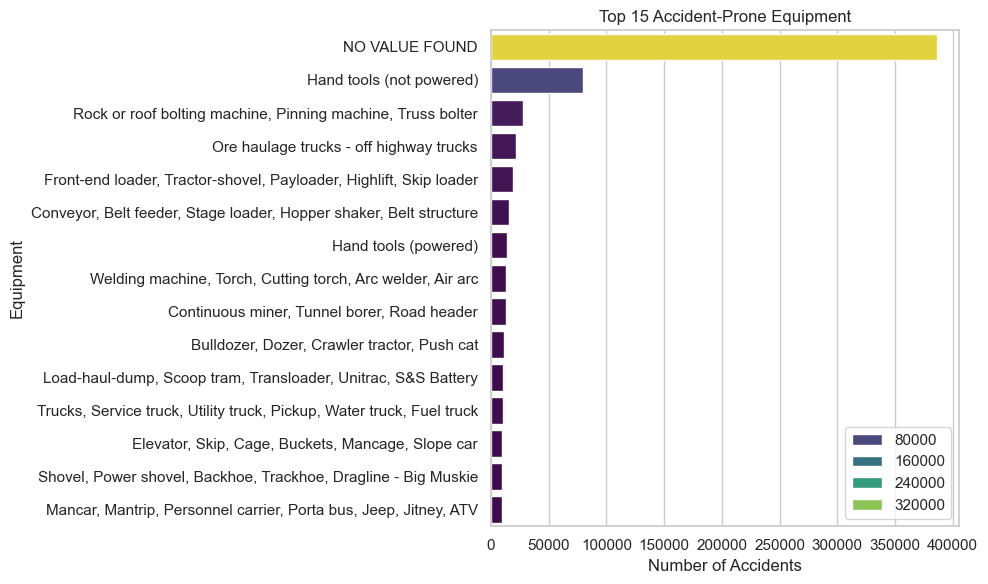

In [11]:
# a) Most accident-prone equipment
equip_counts = df['mining_equip'].value_counts().head(15)
plt.figure()
sns.barplot(x=equip_counts.values, y=equip_counts.index,hue=equip_counts.values, palette="viridis")
plt.title("Top 15 Accident-Prone Equipment")
plt.xlabel("Number of Accidents")
plt.ylabel("Equipment")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "risk_equipment.png"))
plt.show()

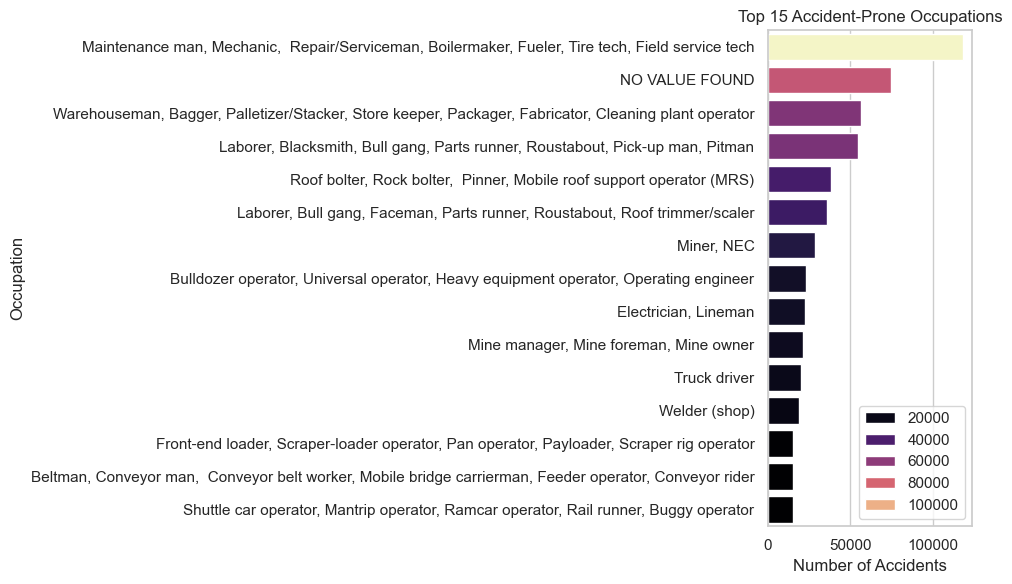

In [12]:
# b) Most accident-prone occupations
occ_counts = df['ai_occ_desc'].value_counts().head(15)
plt.figure()
sns.barplot(x=occ_counts.values, y=occ_counts.index,hue=occ_counts.values ,palette="magma")
plt.title("Top 15 Accident-Prone Occupations")
plt.xlabel("Number of Accidents")
plt.ylabel("Occupation")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "risk_occupations.png"))
plt.show()

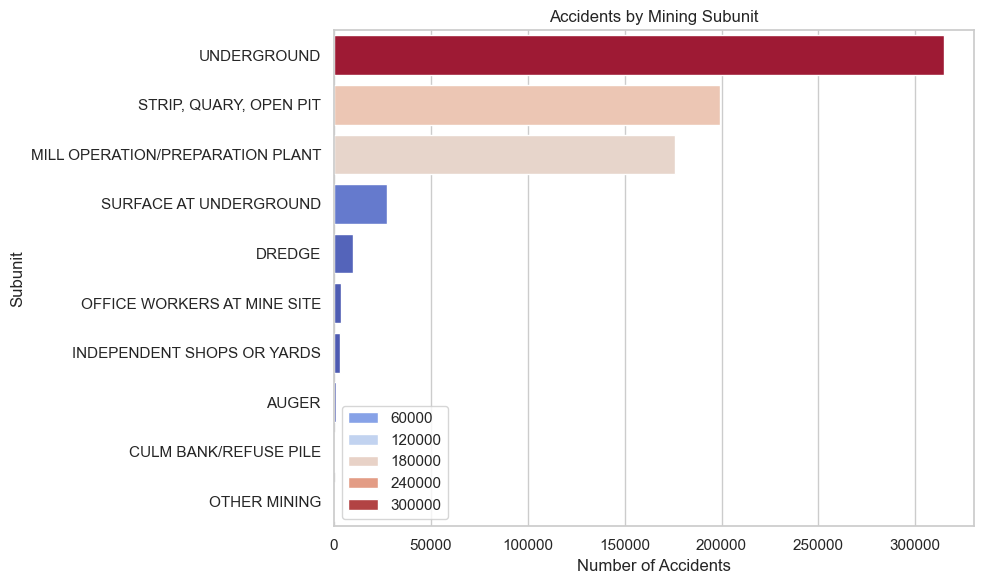

In [13]:
# c) Accidents by location (subunit)
location_counts = df['subunit_desc'].value_counts()
plt.figure()
sns.barplot(x=location_counts.values, y=location_counts.index,hue=location_counts.values ,palette="coolwarm")
plt.title("Accidents by Mining Subunit")
plt.xlabel("Number of Accidents")
plt.ylabel("Subunit")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "risk_location.png"))
plt.show()

In [14]:
# ----------------------------
# 2. SEVERITY MEASUREMENT
# ----------------------------

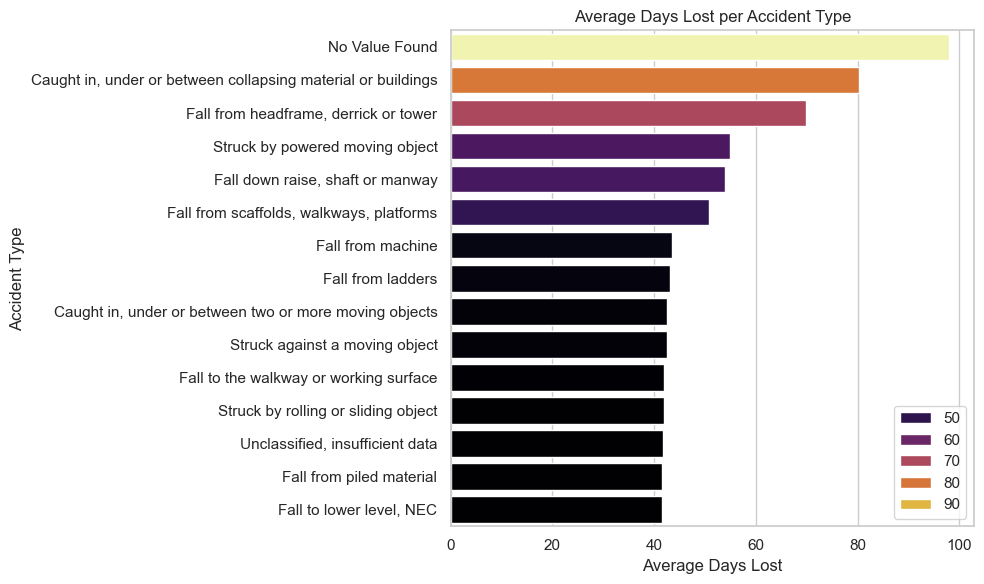

In [15]:
# a) Average days lost per accident type
days_lost_type = df.groupby('accident_type')['days_lost'].mean().sort_values(ascending=False).head(15)
plt.figure()
sns.barplot(x=days_lost_type.values, y=days_lost_type.index,hue=days_lost_type.values ,palette="inferno")
plt.title("Average Days Lost per Accident Type")
plt.xlabel("Average Days Lost")
plt.ylabel("Accident Type")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "severity_days_lost.png"))
plt.show()

In [53]:
print(df['inj_degr_desc'].dropna().unique())

['ACCIDENT ONLY' 'DAYS AWAY FROM WORK ONLY'
 'NO DYS AWY FRM WRK,NO RSTR ACT' 'PERM TOT OR PERM PRTL DISABLTY'
 'DAYS RESTRICTED ACTIVITY ONLY' 'DYS AWY FRM WRK & RESTRCTD ACT'
 'OCCUPATNAL ILLNESS NOT DEG 1-6' 'FATALITY'
 'ALL OTHER CASES (INCL 1ST AID)' 'INJURIES DUE TO NATURAL CAUSES'
 'INJURIES INVOLVNG NONEMPLOYEES' 'NO VALUE FOUND']


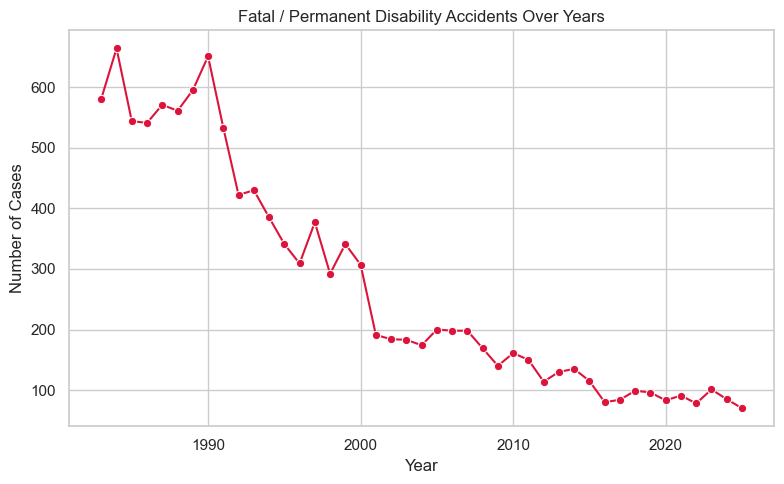

In [54]:
# b) Fatality trends over years
# Ensure ai_year numeric
df['ai_year'] = pd.to_numeric(df['ai_year'], errors='coerce')

# Filter fatal or permanent disability cases
fatal_df = df[df['inj_degr_desc'].str.contains('fatal|perm', case=False, na=False)]

# Group by year
fatal_year = fatal_df.groupby('ai_year').size().sort_index()

# Plot
plt.figure(figsize=(8, 5))
sns.lineplot(x=fatal_year.index, y=fatal_year.values, marker='o', color='crimson')
plt.title("Fatal / Permanent Disability Accidents Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "severity_fatal_trend.png"))
plt.show()

In [17]:
# ----------------------------
# 3. ROOT CAUSE UNDERSTANDING
# ----------------------------

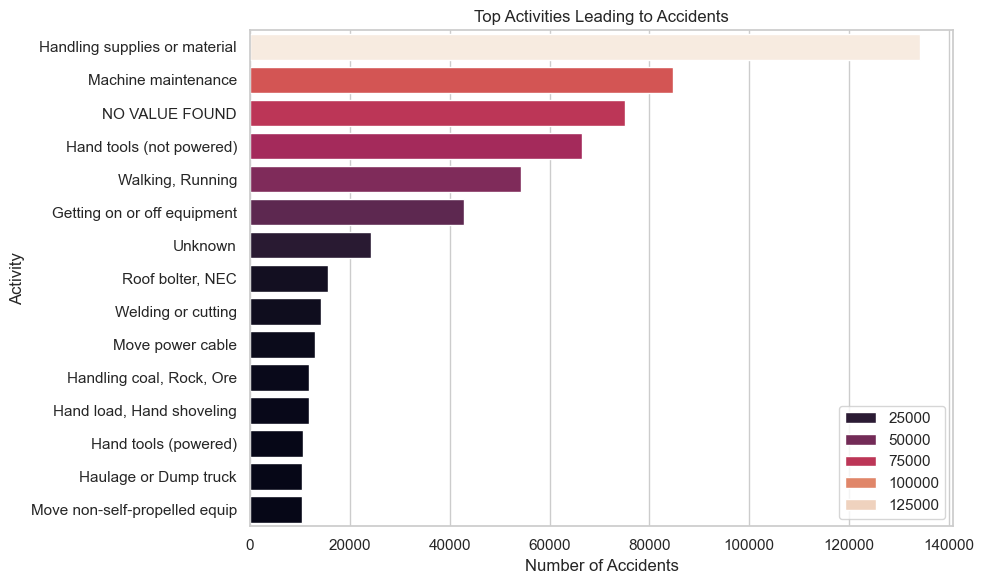

In [19]:
# a) Accidents by activity
activity_counts = df['ai_acty_desc'].value_counts().head(15)
plt.figure()
sns.barplot(x=activity_counts.values, y=activity_counts.index,hue=activity_counts.values ,palette="rocket")
plt.title("Top Activities Leading to Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Activity")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "root_activity.png"))
plt.show()

C:\Users\Ismail\AppData\Local\Temp\ipykernel_7392\643636451.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  exp_days_lost = df.groupby('experience_group')['days_lost'].mean()


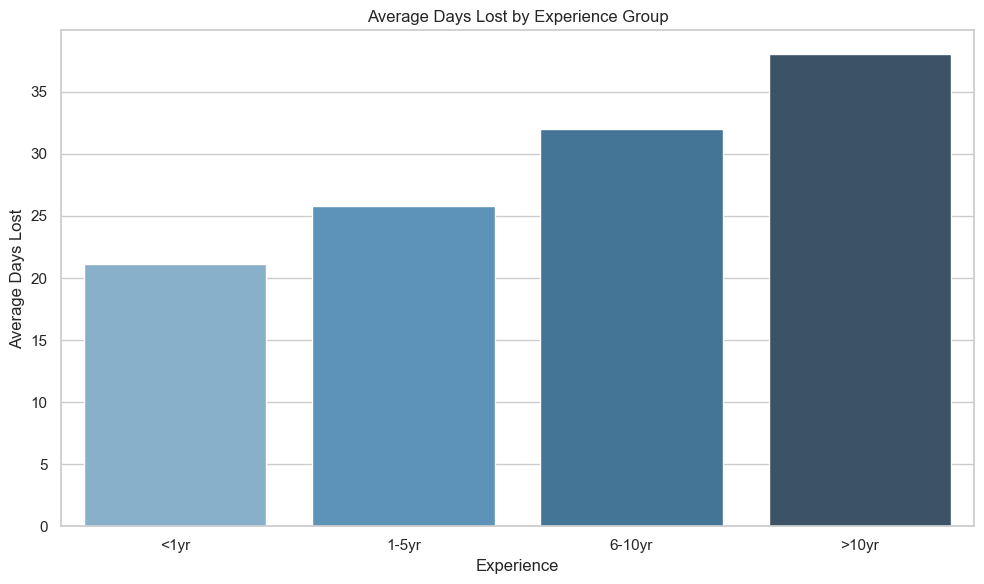

In [21]:
# b) Experience vs average days lost
df['experience_group'] = pd.cut(df['exper_tot_calc'], bins=[-1,1,5,10,100], labels=['<1yr','1-5yr','6-10yr','>10yr'])
exp_days_lost = df.groupby('experience_group')['days_lost'].mean()
plt.figure()
sns.barplot(x=exp_days_lost.index, y=exp_days_lost.values,hue=exp_days_lost.index ,palette="Blues_d")
plt.title("Average Days Lost by Experience Group")
plt.xlabel("Experience")
plt.ylabel("Average Days Lost")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "root_experience.png"))
plt.show()

C:\Users\Ismail\AppData\Local\Temp\ipykernel_7392\1340954233.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=inj_source_counts.values, y=inj_source_counts.index, palette="cubehelix")


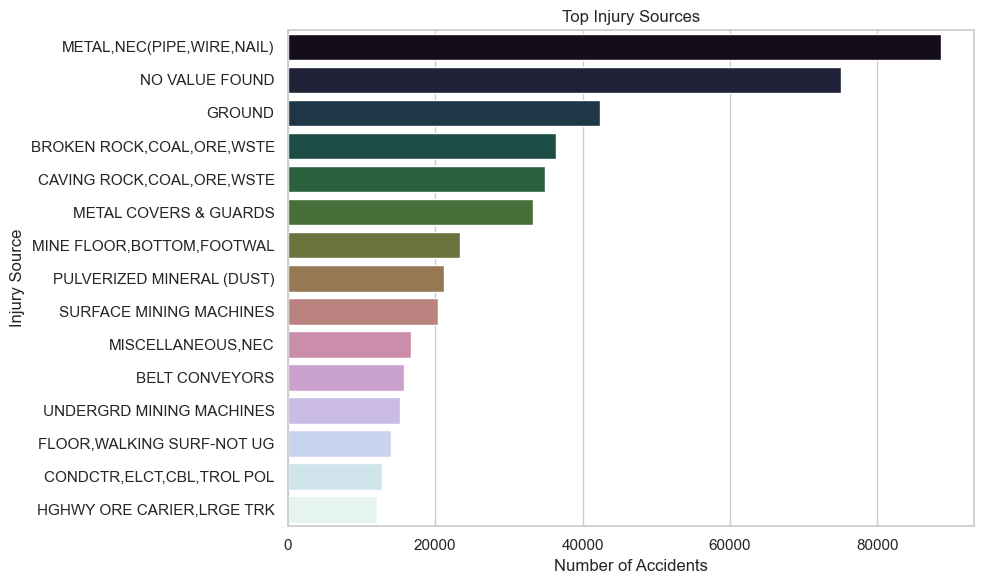

In [35]:
# c) Injury sources
inj_source_counts = df['injury_source'].value_counts().head(15)
plt.figure()
sns.barplot(x=inj_source_counts.values, y=inj_source_counts.index, palette="cubehelix")
plt.title("Top Injury Sources")
plt.xlabel("Number of Accidents")
plt.ylabel("Injury Source")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "root_injury_source.png"))
plt.show()

In [24]:
# ----------------------------
# 4. PERFORMANCE BENCHMARKING
# ----------------------------

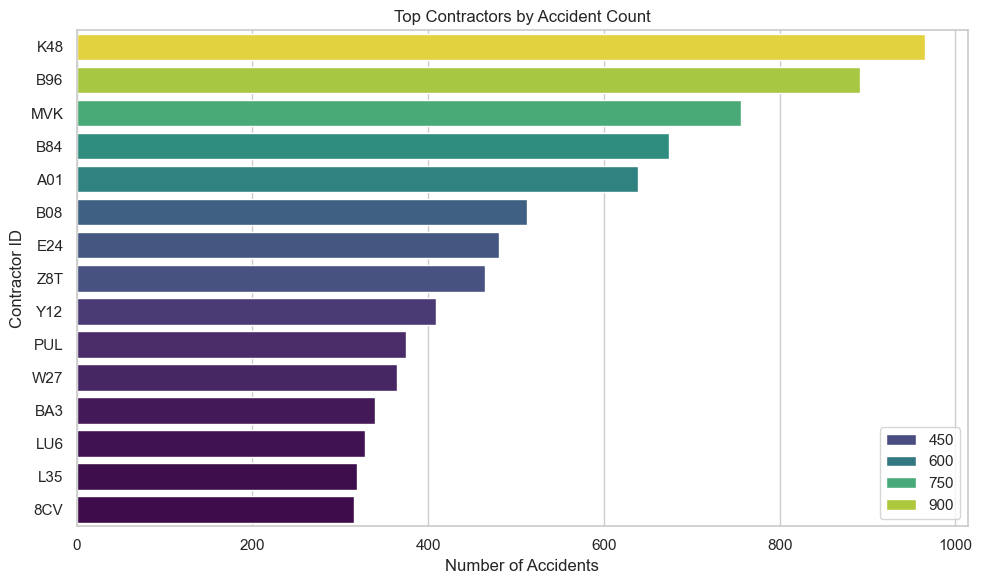

In [25]:
# a) Top contractors by accident count
contractor_counts = df['cntctr_id'].value_counts().head(15)
plt.figure()
sns.barplot(x=contractor_counts.values, y=contractor_counts.index,hue=contractor_counts.values ,palette="viridis")
plt.title("Top Contractors by Accident Count")
plt.xlabel("Number of Accidents")
plt.ylabel("Contractor ID")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "performance_contractors.png"))
plt.show()

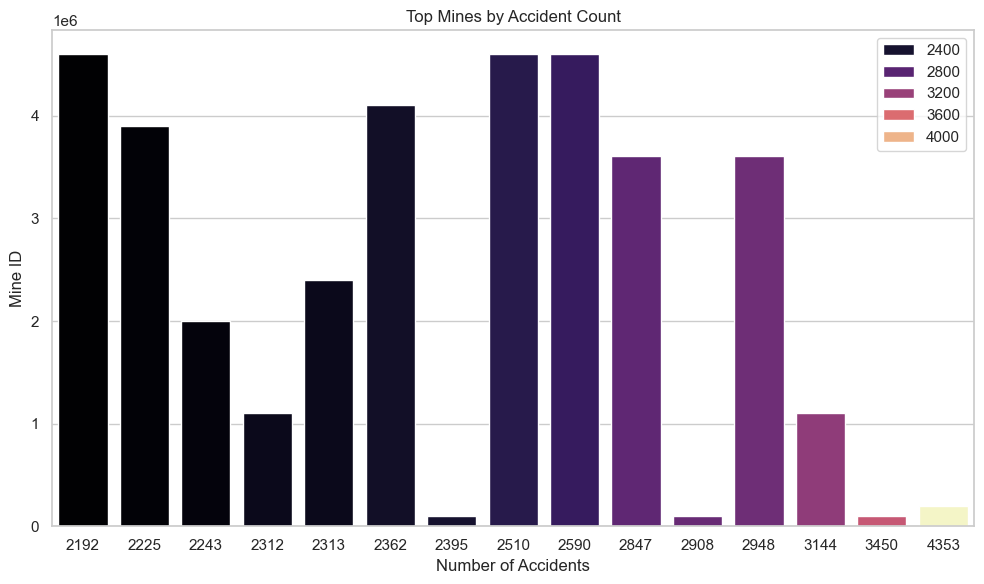

In [26]:
# b) Top mines by accident count
mine_counts = df['mine_id'].value_counts().head(15)
plt.figure()
sns.barplot(x=mine_counts.values, y=mine_counts.index,hue=mine_counts.values ,palette="magma")
plt.title("Top Mines by Accident Count")
plt.xlabel("Number of Accidents")
plt.ylabel("Mine ID")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "performance_mines.png"))
plt.show()

<Figure size 1000x600 with 0 Axes>

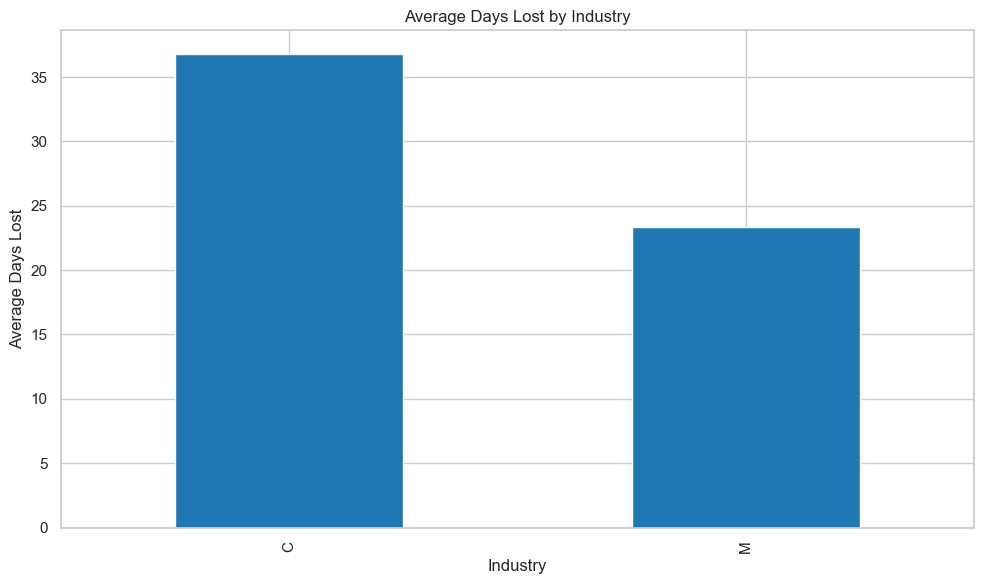

In [27]:
# c) Industry comparison (coal vs metal)
industry_df = df.groupby('coal_metal_ind')['days_lost'].agg(['count','mean'])
plt.figure()
industry_df.plot(kind='bar', y='mean', legend=False, color=['#1f77b4'])
plt.title("Average Days Lost by Industry")
plt.xlabel("Industry")
plt.ylabel("Average Days Lost")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "performance_industry.png"))
plt.show()

In [28]:
# ----------------------------
# 5. SAFETY MONITORING
# ----------------------------

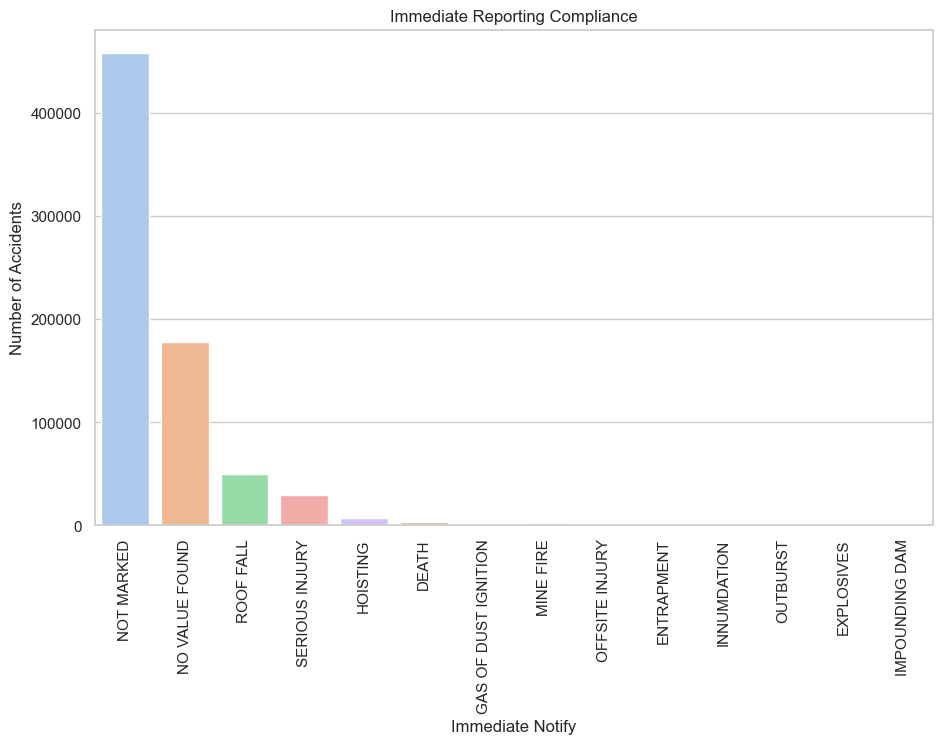

In [31]:
# a) Reporting compliance
report_counts = df['immed_notify'].value_counts()
plt.figure()
sns.barplot(x=report_counts.index, y=report_counts.values,hue=report_counts.index, palette="pastel")
plt.title("Immediate Reporting Compliance")
plt.xlabel("Immediate Notify")
plt.ylabel("Number of Accidents")
plt.tight_layout()
plt.xticks(rotation=90)
plt.savefig(os.path.join(output_dir, "safety_reporting.png"))
plt.show()

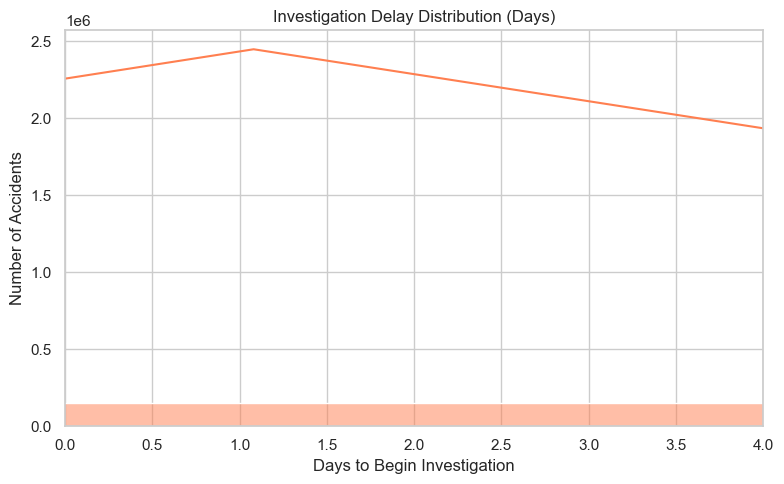

In [52]:
# b) Investigation delay
df['invest_begin_dt'] = pd.to_datetime(df['invest_begin_dt'], errors='coerce', dayfirst=True)
df['invest_delay'] = (df['invest_begin_dt'] - df['ai_dt']).dt.days

plt.figure(figsize=(8,5))
sns.histplot(df['invest_delay'].dropna(), bins=30, kde=True, color='coral')
plt.title("Investigation Delay Distribution (Days)")
plt.xlabel("Days to Begin Investigation")
plt.ylabel("Number of Accidents")
plt.xlim(0, df['invest_delay'].quantile(0.95))
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "safety_investigation_delay.png"))
plt.show()

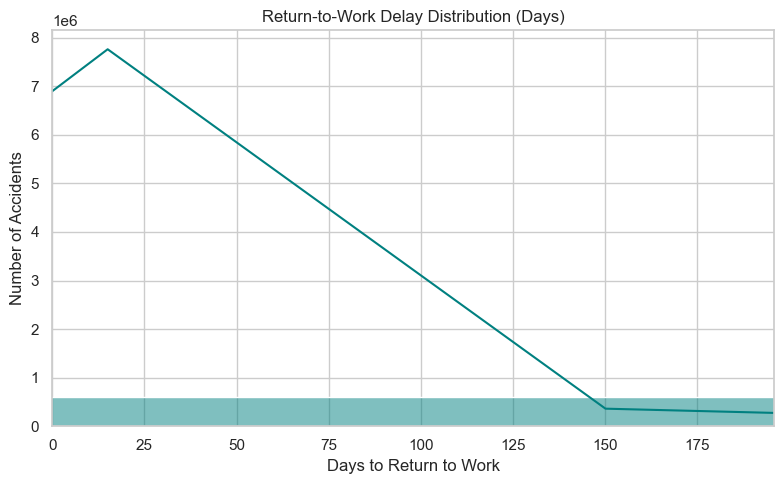

In [48]:
# c) Return-to-work delay
df['ai_dt'] = pd.to_datetime(df['ai_dt'], errors='coerce', dayfirst=True)
df['return_to_work_dt'] = pd.to_datetime(df['return_to_work_dt'], errors='coerce', dayfirst=True)
df['recovery_delay'] = (df['return_to_work_dt'] - df['ai_dt']).dt.days

plt.figure(figsize=(8,5))
sns.histplot(df['recovery_delay'].dropna(), bins=30, kde=True, color='teal')
plt.title("Return-to-Work Delay Distribution (Days)")
plt.xlabel("Days to Return to Work")
plt.ylabel("Number of Accidents")
plt.xlim(0, df['recovery_delay'].quantile(0.95))
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "safety_return_to_work.png"))
plt.show()